<a href="https://colab.research.google.com/github/antonionipo/Extracao-e-Tratamento-de-Dados-em-Python/blob/main/RID196075_Desafio05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare seu dataset para modelagem de dados
Aplique os conhecimentos de limpeza e organização de dados (data cleaning & data wrangling) para estruturar uma base de dados para modelagem. Boa parte do dia de um cientista de dados é garantir a organização de suas bases para conseguir um modelo preciso, dominar isso é fundamental na carreira

In [616]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale, power_transform

## Análise Descritiva
Data Understanding - Collect Inicial Data (Inicial Data Collection), Describe Data (Data Description Report), Explore Data (Data Exploration Report), Verify Data Quality (Data Quality Report).

Leia o arquivo e inspecione os dados

In [617]:
# Leia o dataset
df = pd.read_csv('data.csv', encoding='ISO-8859-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [618]:
# Utilize o describe para verificar a distribuição dos dados
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [619]:
# Analise o tipo dos dados
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,float64
Country,object


## Análise Exploratória
Data Preparation - Select Data (Rationale for Inclusion/Exclusion), Clean Data (Derived Attributes Generated Records), Integrate Data (Merged Data), Format Data (Reformatted Data), Dataset (Dataset Description).

Valores faltantes na identificação do cliente

In [620]:
# Verifique os valores nulos com o isna e utilize a função sum para a somar a quantidade de nulos
df.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [621]:
# Utilize a função dropna para remover os nulos
df.dropna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


Preços unitários e quantidade de produtos iguais ou inferior a 0

In [622]:
# Realize um filtro para verificar se existem dados nulos ou menor que zero na coluna de preços
df[df['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,12/8/2011 13:58,0.0,NaN,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,12/8/2011 13:58,0.0,NaN,United Kingdom
538554,581408,85175,NaN,20,12/8/2011 14:06,0.0,NaN,United Kingdom


In [623]:
# Filtre o dataset apenas para conter preços acima de zero
df = df[df['UnitPrice'] > 0]
df[df['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [624]:
# Realize um filtro para verificar se existem dados nulos ou menor que zero na coluna de quantidade
if df[df['Quantity'] <= 0]['Quantity'].count() > 0:
    df = df[df['Quantity'] > 0]
else:
  pass


In [625]:
# Filtre o dataset apenas para conter quantidade acima de zero
numeric_cols = df.select_dtypes(include=np.number).columns
for i, col in enumerate(df[numeric_cols]):
  df = df[df[col] > 0]
print(df[df[numeric_cols] <= 0].sum())

InvoiceNo        0
StockCode        0
Description      0
Quantity       0.0
InvoiceDate      0
UnitPrice      0.0
CustomerID     0.0
Country          0
dtype: object


Verifique se existem linhas duplicadas

In [626]:
# Verifique se tem linhas duplicadas com a função duplicated
df.duplicated().sum()

5192

In [627]:
# Drope as linhas duplicadas
if df.duplicated().sum() > 0:
  df.drop_duplicates(inplace=True)
else:
  pass
df.duplicated().sum()

0

Tipos de dados da coluna

In [628]:
# Corrija o tipo de dado do CustomerID
df['CustomerID'] = df['CustomerID'].astype(int)
# df['CustomerID'] = df['CustomerID'].astype(str) #ID não é int, ID é string! O correto seria passar para int e logo em seguida passar para string
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,object
UnitPrice,float64
CustomerID,int64
Country,object


In [629]:
# Corrija o tipo de dado da InvoiceDate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df.dtypes

,0
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,int64
Country,object


Tratando os outliers

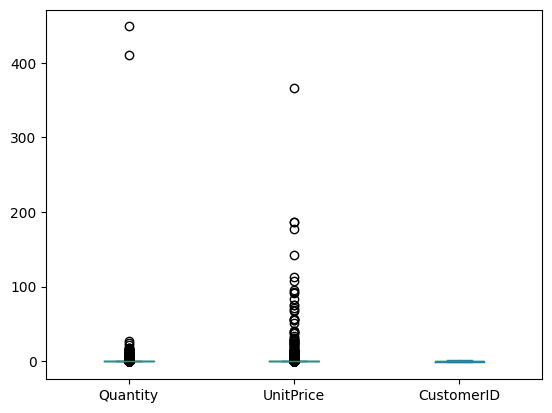

In [630]:
# Vamos considerar estes valores como erro. Visualize os outliers e remova os outliers extremos em que a quantidade do item na compra é superior a 10.000, e o preço unitário é maior que 5.000.
df[numeric_cols].apply(lambda x: (x - x.mean()) / x.std()).plot.box()
df = df[df['Quantity'] < 10000]
df = df[df['UnitPrice'] < 5000]

Crie uma coluna adicional

In [631]:
# Utilize as colunas Quantity e UnitPrice.  Crie uma coluna adicional com o preço total da compra
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


Última data

In [632]:
# Utilize a função max(). Calcule a data da última compra no dataset como um todo, pois vamos utilizar este valor como data de comparação para cálculo da recência.
df['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

Plotando gráficos

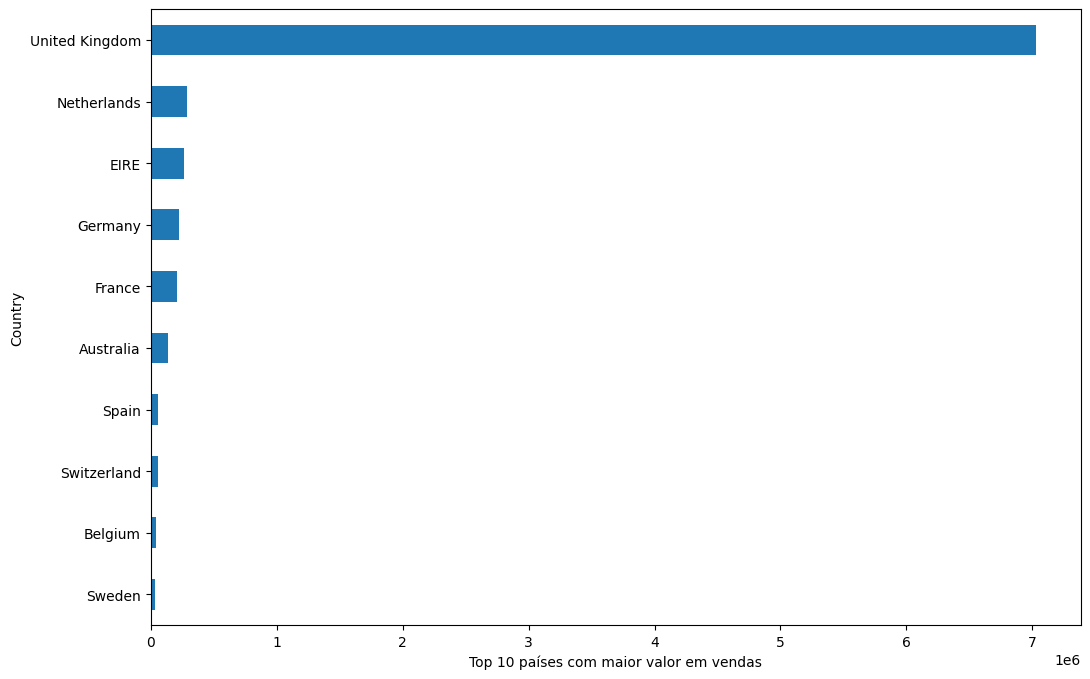

In [633]:
# Top 10 países com maior valor em vendas
top10_maiorvalorvenda = df['TotalPrice'].groupby(df['Country']).sum().sort_values(ascending=False)[:10]
pd.Series(top10_maiorvalorvenda).sort_values().plot.barh(figsize=(12,8))
plt.xlabel('Top 10 países com maior valor em vendas')
plt.show()

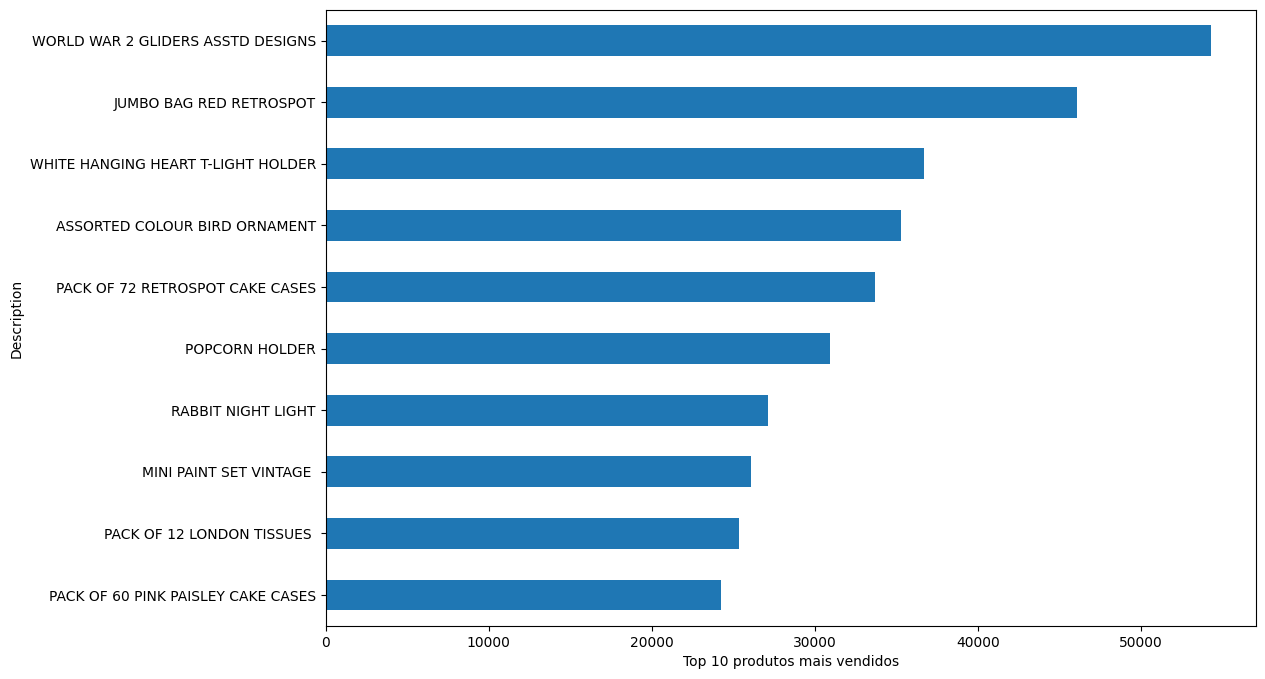

In [634]:
# Top 10 produtos mais vendidos
top10_produtosmaisvendidos = df['Quantity'].groupby(df['Description']).sum().sort_values(ascending=False)[:10]
pd.Series(top10_produtosmaisvendidos).sort_values().plot.barh(figsize=(12,8))
plt.xlabel('Top 10 produtos mais vendidos')
plt.show()

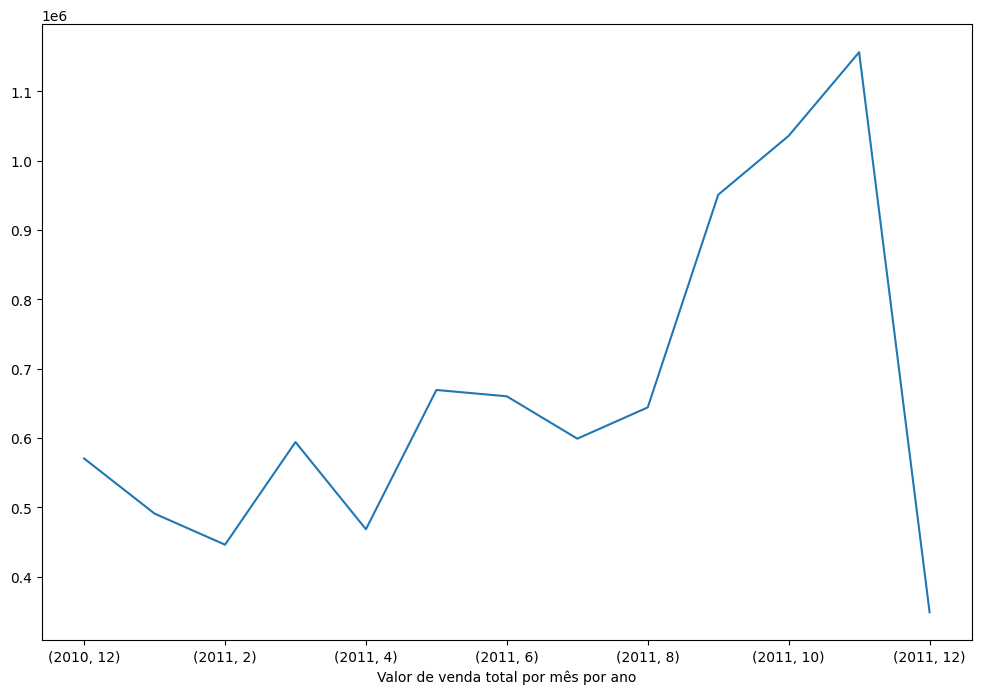

In [635]:
# Valor de venda total por mês
df['TotalPrice'].groupby([df['InvoiceDate'].dt.year, df['InvoiceDate'].dt.month]).sum().plot(figsize=(12,8))
plt.xlabel('Valor de venda total por mês por ano')
plt.show()

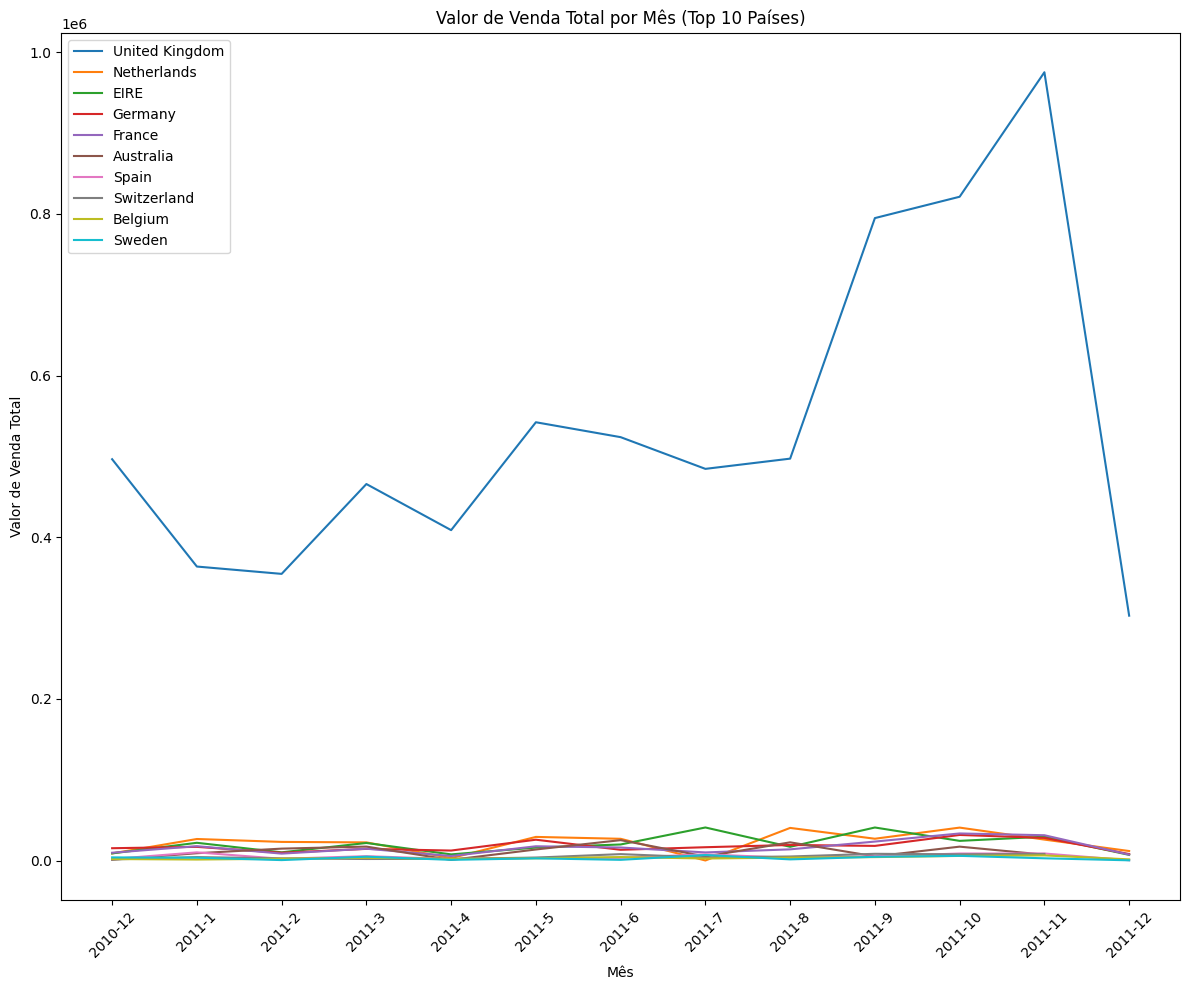

In [636]:
# Valor de venda total por mês e por país (considere apenas os top 10)
df = df.assign(InvoiceYear = df['InvoiceDate'].dt.year, InvoiceMonth = df['InvoiceDate'].dt.month)
sales_by_country_month = df.groupby(['Country', 'InvoiceYear', 'InvoiceMonth'])['TotalPrice'].sum().reset_index()
top_10_countries = sales_by_country_month.groupby('Country')['TotalPrice'].sum().nlargest(10).index
top_10_sales = sales_by_country_month[sales_by_country_month['Country'].isin(top_10_countries)]

plt.figure(figsize=(12, 10))
for country in top_10_countries:
    country_data = top_10_sales[top_10_sales['Country'] == country]
    plt.plot(country_data['InvoiceYear'].astype(str) + '-' + country_data['InvoiceMonth'].astype(str), country_data['TotalPrice'], label=country)
plt.xlabel('Mês')
plt.ylabel('Valor de Venda Total')
plt.title('Valor de Venda Total por Mês (Top 10 Países)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Cálculo do RFM

In [637]:
# Agrupe os dados por cliente e pedido/compra (InvoiceNo) e obtenha a data e o preço total do pedido.
# Com isso, agrupe novamente apenas por cliente e calcule o RFM, onde:

# - R é a recência, diferença em dias da última compra do cliente e da última compra disponível no conjunto de dados, que calcularam previamente.
# - F é a frequência, ou seja, a quantidade de compras feitas pelo cliente;
# - M é o ticket médio, ou seja, a média das compras feitas pelo cliente.
df_rfm = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (df['InvoiceDate'].max() - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalPrice': lambda x: x.sum()})
df_rfm.head()

,InvoiceDate,InvoiceNo,TotalPrice
CustomerID,,,
12347,1,182,4310.00
12348,74,31,1797.24
12349,18,73,1757.55
12350,309,17,334.40
12352,35,85,2506.04


## Modelagem

## Calculando Predição